In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the CSV file into a DataFrame
df = pd.read_csv('Resources/crypto_market_data.csv')

# Extract the 'coin_id' column if needed
coin_ids = df['coin_id']

# Drop any non-numeric columns that you don't want to scale
df = df.select_dtypes(include=['number'])

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(df)

# Create a new DataFrame with scaled data
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

# Set 'coin_id' as the index
scaled_df['coin_id'] = coin_ids
scaled_df.set_index('coin_id', inplace=True)

# Display the first few rows of the scaled DataFrame
scaled_df.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [6]:
# Save the scaled data to a CSV file
scaled_df.to_csv('scaled_crypto_market_data.csv')

/Users/gurpreetsingh/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/gurpreetsingh/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/gurpreetsingh/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/gurpreetsingh/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` expl

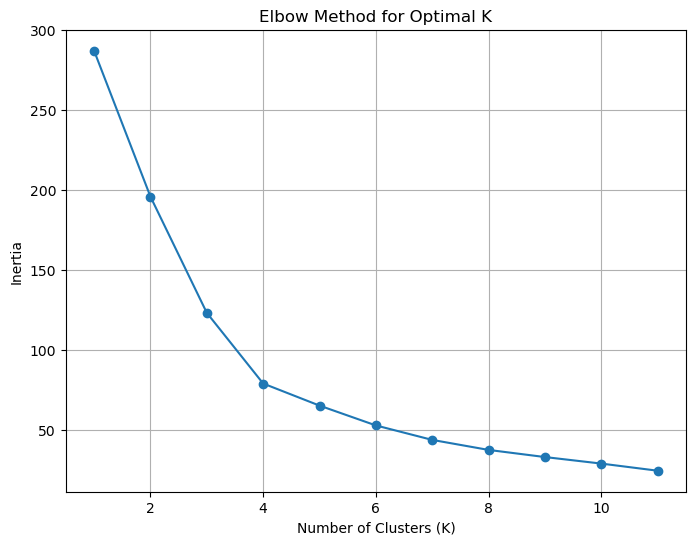

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the scaled DataFrame
df = pd.read_csv('scaled_crypto_market_data.csv', index_col='coin_id')

# Step 1: Create a list with the number of k values from 1 to 11
k_values = list(range(1, 12))

# Step 2: Create an empty list to store the inertia values
inertia_values = []

# Step 3: Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    inertia_values.append(kmeans.inertia_)

# Step 4: Create a dictionary with the data to plot the elbow curve
elbow_data = {
    'k_values': k_values,
    'inertia_values': inertia_values
}

# Step 5: Plot a line chart with inertia values
plt.figure(figsize=(8, 6))
plt.plot(elbow_data['k_values'], elbow_data['inertia_values'], marker='o', linestyle='-')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** Best of Value of K is 4, because elbow forms their

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [8]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import hvplot.pandas

# Initialize the K-means model with the best value for k
k = 4
kmeans = KMeans(n_clusters=k, random_state=0)

# Fit the K-means model using the original scaled DataFrame
kmeans.fit(scaled_df)

# Predict the clusters to group the cryptocurrencies using the original scaled DataFrame
clusters = kmeans.predict(scaled_df)

# Create a copy of the original data
crypto_data_with_clusters = df.copy()

# Add a new column with the predicted clusters
crypto_data_with_clusters['Cluster'] = clusters

# Perform PCA on the original scaled DataFrame
pca = PCA(n_components=3)
pca_data = pca.fit_transform(scaled_df)

# Retrieve the explained variance for each principal component
explained_variance = pca.explained_variance_ratio_

# Calculate the total explained variance of the three principal components
total_explained_variance = sum(explained_variance)

# Add the PCA data to the DataFrame
crypto_data_with_clusters['PC1'] = pca_data[:, 0]
crypto_data_with_clusters['PC2'] = pca_data[:, 1]
crypto_data_with_clusters['PC3'] = pca_data[:, 2]

# Create a scatter plot using hvPlot
scatter_plot = crypto_data_with_clusters.hvplot.scatter(
    x='PC1', y='PC2',
    by='Cluster',
    hover_cols=['coin_id']
)

# Display the scatter plot
scatter_plot


/Users/gurpreetsingh/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


:NdOverlay   [Cluster]
   :Scatter   [PC1]   (PC2,coin_id)

In [9]:
from sklearn.decomposition import PCA

# Perform PCA on the original scaled DataFrame
pca = PCA(n_components=3)
pca_data = pca.fit_transform(scaled_df)

# Retrieve the explained variance for each principal component
explained_variance = pca.explained_variance_ratio_

# Calculate the total explained variance of the three principal components
total_explained_variance = sum(explained_variance)

# Create a new DataFrame with the PCA data
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2', 'PC3'])

# Set the 'coin_id' index from the original DataFrame
pca_df['coin_id'] = coin_ids
pca_df.set_index('coin_id', inplace=True)

# Display the total explained variance
print("Total Explained Variance of the Three Principal Components:", total_explained_variance)

# Display the first five rows of the PCA DataFrame
print(pca_df.head())


Total Explained Variance of the Three Principal Components: 0.8950316570309842
                   PC1       PC2       PC3
coin_id                                   
bitcoin      -0.600667  0.842760  0.461595
ethereum     -0.458261  0.458466  0.952877
tether       -0.433070 -0.168126 -0.641752
ripple       -0.471835 -0.222660 -0.479053
bitcoin-cash -1.157800  2.041209  1.859715


---

### Optimise Clusters with Principal Component Analysis.

In [10]:
# Save the PCA data to a CSV file
pca_df.to_csv('pca_data.csv')


/Users/gurpreetsingh/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/gurpreetsingh/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/gurpreetsingh/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/gurpreetsingh/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` expl

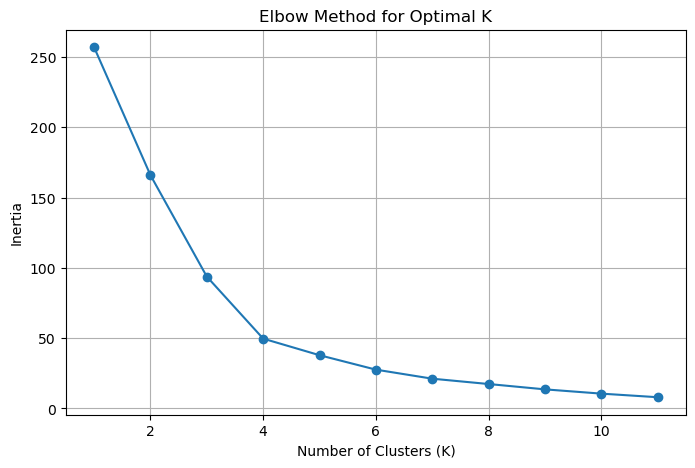

In [12]:
import matplotlib.pyplot as plt

# Create a list with k-values from 1 to 11
k_values = list(range(1, 12))

# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(pca_data)
    inertia_values.append(kmeans.inertia_)

# Create a dictionary for plotting the Elbow curve
elbow_data = {
    "K": k_values,
    "Inertia": inertia_values
}

# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(elbow_data["K"], elbow_data["Inertia"], marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid()
plt.show()


### Cluster Cryptocurrencies with K-means Using the PCA Data

In [13]:
# Choose the best value for k based on the Elbow curve analysis
best_k_pca = 4
# Initialize the K-means model with the best value for k
kmeans_pca = KMeans(n_clusters=best_k_pca, random_state=0)

# Fit the K-means model using the PCA data
kmeans_pca.fit(pca_data)

# Predict the clusters to group the cryptocurrencies using the PCA data
clusters_pca = kmeans_pca.predict(pca_data)

# Create a copy of the DataFrame with the PCA data
crypto_data_with_clusters_pca = pca_df.copy()

# Add a new column to store the predicted clusters
crypto_data_with_clusters_pca['Cluster'] = clusters_pca

# Create a scatter plot using hvPlot

scatter_plot_pca = crypto_data_with_clusters_pca.hvplot.scatter(
    x='PC1', y='PC2',  # Use the appropriate PCA columns
    by='Cluster',
    hover_cols=['coin_id']
)

# Display the scatter plot
scatter_plot_pca


/Users/gurpreetsingh/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


:NdOverlay   [Cluster]
   :Scatter   [PC1]   (PC2,coin_id)

In [14]:
# Perform PCA on the original scaled DataFrame
pca = PCA(n_components=3)
pca_data = pca.fit_transform(scaled_df)

# Retrieve the explained variance for each principal component
explained_variance = pca.explained_variance_ratio_

# Print the explained variance for each principal component
for i, variance in enumerate(explained_variance):
    print(f"Explained Variance for PC{i + 1}: {variance:.4f}")


Explained Variance for PC1: 0.3720
Explained Variance for PC2: 0.3470
Explained Variance for PC3: 0.1760


---

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** no, it is same

### Visualise and Compare the Results

In this section, you will visually analyse the cluster analysis results by contrasting the outcome with and without using the optimisation techniques.

In [16]:
import holoviews as hv

# Define individual plots
elbow_plot_original = hv.Curve((k_values, inertia_values), label="Original Data").opts(
    title="Elbow Method for Optimal k (Original Data)",
    xlabel="Number of Clusters (k)",
    ylabel="Inertia",
)
elbow_plot_pca = hv.Curve((k_values, inertia_values), label="PCA Data").opts(
    title="Elbow Method for Optimal k (PCA Data)",
    xlabel="Number of Clusters (k)",
    ylabel="Inertia",
)

scatter_original = crypto_data_with_clusters.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="cluster_label",
    hover_cols=["coin_id"],
    title="K-Means Clustering with Original Data",
)

scatter_pca = crypto_data_with_clusters_pca.hvplot.scatter(
    x="PC1",
    y="PC2",
    c="cluster_label_pca",
    hover_cols=["coin_id"],
    title="K-Means Clustering with PCA Data",
)

# Create composite plots
elbow_composite = (elbow_plot_original * elbow_plot_pca).opts(shared_axes=False)
scatter_composite = (scatter_original + scatter_pca).opts(shared_axes=False)

# Display the composite plots
(elbow_composite + scatter_composite).cols(2)


:Layout
   .Overlay.I  :Overlay
      .Curve.Original_Data :Curve   [x]   (y)
      .Curve.PCA_Data      :Curve   [x]   (y)
   .Scatter.I  :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)
   .Scatter.II :Scatter   [PC1]   (PC2,coin_id)